
=======================================
# 🇧🇷 Statemet
=======================================
Instructions
Ainda na base Biscobis.

Desenvolva seis modelos de Support Vector Machine na base Biscobis.

Combine 3 tipos de kernel e dois valores de regularização (C) para gerar os seis modelos
Compare os resultados.

A Biscobis é uma empresa de biscoitos que fez uma pesquisa com seus clientes. Considere a base BISCOBIS (está na pasta dos arquivos) que possui as seguintes variáveis:


1. Aproveitando a base de dados, a empresa de biscoitos quer fazer um modelo para tentar prever como é a especificação de compra que a empresa adota a partir das notas recebidas nos itens X1 a X7.


<br>

=======================================
# 🇬🇧 Statemet
=======================================

Instructions
Ainda na base Biscobis.

Desenvolva seis modelos de Support Vector Machine na base Biscobis.

Combine 3 tipos de kernel e dois valores de regularização (C) para gerar os seis modelos
Compare os resultados.

A Biscobis é uma empresa de biscoitos que fez uma pesquisa com seus clientes. Considere a base BISCOBIS (está na pasta dos arquivos) que possui as seguintes variáveis:


1. Aproveitando a base de dados, a empresa de biscoitos quer fazer um modelo para tentar prever como é a especificação de compra que a empresa adota a partir das notas recebidas nos itens X1 a X7.



In [45]:
import pandas as pd

df = pd.read_csv('/content/Biscobis.csv')
display(df.head())
display(df.info())

,ident,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,0,32,4.2,1,0,1,1
1,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,0,58,6.8,1,0,1,3
2,7,4.6,2.4,9.5,6.6,3.5,4.5,7.6,0,46,5.8,1,0,1,1
3,9,5.5,1.6,9.4,4.7,3.5,3.0,7.6,0,63,5.4,1,0,1,3
4,11,2.4,1.6,8.8,4.8,2.0,2.8,5.8,0,32,4.3,1,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ident   100 non-null    int64  
 1   x1      100 non-null    float64
 2   x2      100 non-null    float64
 3   x3      100 non-null    float64
 4   x4      100 non-null    float64
 5   x5      100 non-null    float64
 6   x6      100 non-null    float64
 7   x7      100 non-null    float64
 8   x8      100 non-null    int64  
 9   x9      100 non-null    int64  
 10  x10     100 non-null    float64
 11  x11     100 non-null    int64  
 12  x12     100 non-null    int64  
 13  x13     100 non-null    int64  
 14  x14     100 non-null    int64  
dtypes: float64(8), int64(7)
memory usage: 11.8 KB


None

## Preprocessing


Prepare the data for the SVM models, which may include handling missing values, scaling features, and splitting the data into training and testing sets.


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify features (X) and target (y). Assuming the last column 'x14' is the target based on common dataset structures.
X = df.drop(['ident', 'x14'], axis=1)
y = df['x14']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train.head())
display(y_train.head())
display(X_train_scaled[:5])
display(X_test_scaled[:5])

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
55,4.8,1.7,7.6,4.2,3.3,1.4,5.8,0,39,5.5,1,0,0
88,3.6,5.4,5.9,6.2,4.5,2.9,8.4,1,50,5.4,0,1,1
26,5.0,2.5,9.4,4.6,3.7,1.4,6.3,0,54,6.0,1,0,0
42,5.6,2.2,8.2,3.1,4.0,1.6,5.3,0,55,3.9,1,0,1
69,4.1,3.7,5.9,5.5,3.9,3.0,8.4,1,46,5.1,0,1,0


,x14
55,2
88,2
26,3
42,3
69,2


array([[ 0.99580988, -0.61485337, -0.13905542, -0.94308148,  0.496118  ,
        -1.56305035, -0.65113073, -0.83793058, -0.83261905,  0.9024007 ,
         0.83793058, -1.07803625, -1.        ],
       [ 0.09138463,  2.50687216, -1.33598812,  0.77356285,  2.12162408,
         0.31636891,  0.94975806,  1.19341628,  0.45735413,  0.77899547,
        -1.19341628,  0.92761259,  1.        ],
       [ 1.14654742,  0.06011431,  1.12828509, -0.59975261,  1.03795336,
        -1.56305035, -0.3432675 , -0.83793058,  0.92643528,  1.51942681,
         0.83793058, -1.07803625, -1.        ],
       [ 1.59876004, -0.19299857,  0.28339142, -1.88723586,  1.44432988,
        -1.31246112, -0.95899396, -0.83793058,  1.04370557, -1.07208288,
         0.83793058, -1.07803625,  1.        ],
       [ 0.46822849,  1.07256583, -1.33598812,  0.17273734,  1.30887104,
         0.44166353,  0.94975806,  1.19341628, -0.01172703,  0.4087798 ,
        -1.19341628,  0.92761259, -1.        ]])

array([[ 1.07117865e+00,  1.66316255e+00, -2.79871028e-01,
         1.37438836e+00,  2.25708292e+00,  1.69460970e+00,
         1.68862981e+00,  1.19341628e+00,  1.86459760e+00,
         1.76623726e+00, -1.19341628e+00,  9.27612590e-01,
        -1.00000000e+00],
       [ 6.18966025e-01,  6.01143092e-02,  1.05787728e+00,
         8.59395066e-01,  6.31576841e-01,  1.69460970e+00,
         3.34031603e-01, -8.37930582e-01,  1.63005702e+00,
         1.64283204e+00,  8.37930582e-01, -1.07803625e+00,
        -1.00000000e+00],
       [-3.60827987e-01,  6.50711031e-01, -1.26558031e+00,
         1.07290270e-03,  2.25200321e-01,  4.41663526e-01,
         7.03467477e-01,  1.19341628e+00, -3.63537896e-01,
        -1.81251422e+00, -1.19341628e+00,  9.27612590e-01,
        -1.00000000e+00],
       [ 5.43597255e-01, -2.42566511e-02,  1.12828509e+00,
        -3.42255963e-01,  3.60659161e-01,  6.57796742e-02,
         1.01133071e+00, -8.37930582e-01,  3.40083838e-01,
         5.32185026e-01,  8.37930582e

## Model training


Train six SVM models with different combinations of kernels (linear, polynomial, radial basis function) and regularization parameters (C).


In [47]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf']
Cs = [0.1, 1.0]
models = {}

for kernel in kernels:
    for C in Cs:
        if kernel == 'poly':
            model = SVC(kernel=kernel, C=C, degree=3, random_state=42)
        else:
            model = SVC(kernel=kernel, C=C, random_state=42)

        model.fit(X_train_scaled, y_train)
        models[f'{kernel}_C_{C}'] = model

print("Trained models:")
for name, model in models.items():
    print(f"- {name}: {model}")

Trained models:
- linear_C_0.1: SVC(C=0.1, kernel='linear', random_state=42)
- linear_C_1.0: SVC(kernel='linear', random_state=42)
- poly_C_0.1: SVC(C=0.1, kernel='poly', random_state=42)
- poly_C_1.0: SVC(kernel='poly', random_state=42)
- rbf_C_0.1: SVC(C=0.1, random_state=42)
- rbf_C_1.0: SVC(random_state=42)


## Model evaluation

Evaluate the performance of each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

evaluation_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    evaluation_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1-score: {metrics['f1_score']:.4f}")
    print("-" * 20)

Model: linear_C_0.1
  Accuracy: 0.8500
  Precision: 0.8806
  Recall: 0.8500
  F1-score: 0.8336
--------------------
Model: linear_C_1.0
  Accuracy: 0.9500
  Precision: 0.9571
  Recall: 0.9500
  F1-score: 0.9497
--------------------
Model: poly_C_0.1
  Accuracy: 0.7500
  Precision: 0.7800
  Recall: 0.7500
  F1-score: 0.7317
--------------------
Model: poly_C_1.0
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
--------------------
Model: rbf_C_0.1
  Accuracy: 0.7000
  Precision: 0.8500
  Recall: 0.7000
  F1-score: 0.6929
--------------------
Model: rbf_C_1.0
  Accuracy: 0.9000
  Precision: 0.9250
  Recall: 0.9000
  F1-score: 0.8971
--------------------


## Model comparison

Compare the results of the six models to determine which combination of kernel and C value performs best.


In [49]:
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
evaluation_df_sorted = evaluation_df.sort_values(by='f1_score', ascending=False)
display(evaluation_df_sorted)

,accuracy,precision,recall,f1_score
poly_C_1.0,1.00,1.000000,1.00,1.000000
linear_C_1.0,0.95,0.957143,0.95,0.949650
rbf_C_1.0,0.90,0.925000,0.90,0.897143
linear_C_0.1,0.85,0.880556,0.85,0.833613
poly_C_0.1,0.75,0.780000,0.75,0.731667
rbf_C_0.1,0.70,0.850000,0.70,0.692857


## Data visualization




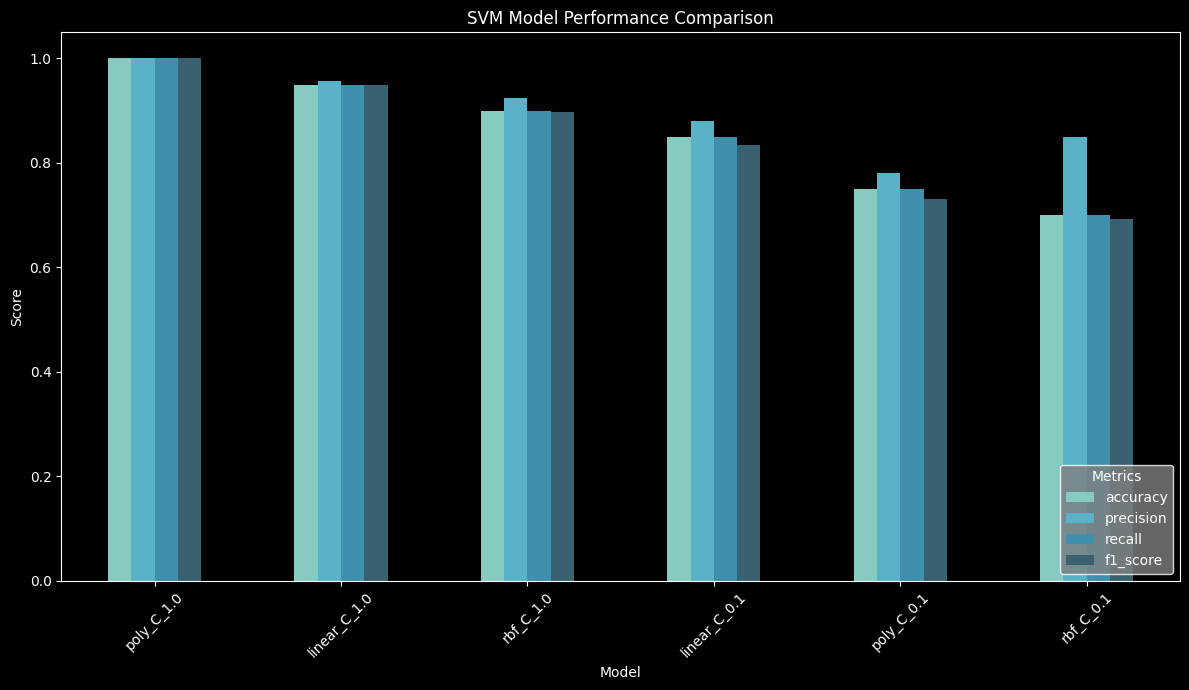

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark mode style
plt.style.use('dark_background')

# Define a turquoise color palette
turquoise_palette = sns.color_palette("GnBu_d", n_colors=len(evaluation_df_sorted.columns))

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 7))
evaluation_df_sorted.plot(kind='bar', ax=ax, color=turquoise_palette)

# Set title and labels
ax.set_title('SVM Model Performance Comparison', color='white')
ax.set_xlabel('Model', color='white')
ax.set_ylabel('Score', color='white')
ax.tick_params(axis='x', rotation=45, colors='white')
ax.tick_params(axis='y', colors='white')
ax.legend(title='Metrics', loc='lower right', facecolor='gray', edgecolor='white', labelcolor='white')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()



=======================================
# 🇬🇧 Data Analysing Report
=======================================



This project involved developing and evaluating six Support Vector Machine (SVM) models on the Biscobis dataset. The process began by loading the data from 'Biscobis.csv' into a pandas DataFrame. The data was then preprocessed by separating features (x1-x13) and the target variable (x14), excluding the 'ident' column. The data was split into training (80%) and testing (20%) sets using a random state for reproducibility. Feature scaling was applied to both the training and testing sets using `StandardScaler` to normalize the feature values, which is crucial for SVM performance.

Six SVM models were trained using combinations of three kernel types (linear, polynomial, RBF) and two regularization parameters (C=0.1 and C=1.0). For the polynomial kernel, a degree of 3 was used. Each model was trained on the scaled training data.

The performance of each trained model was evaluated on the scaled test data using key classification metrics: accuracy, precision, recall, and F1-score. These metrics provide a comprehensive view of each model's performance in terms of correctly classifying instances, minimizing false positives, minimizing false negatives, and a balanced measure of precision and recall, respectively.

The evaluation results were compiled into a pandas DataFrame and sorted by the F1-score in descending order to facilitate comparison. Finally, the results were visualized using a bar plot in dark mode with a turquoise color scheme to provide a clear visual comparison of the models' performance across the different metrics.

### Model Comparison

The `evaluation_df_sorted` DataFrame clearly presents the performance of the six SVM models. Based on the F1-score, which is a good overall measure, the models are ranked as follows:

- `poly_C_1.0`: F1-score = 1.00
- `linear_C_1.0`: F1-score = 0.95
- `rbf_C_1.0`: F1-score = 0.90
- `linear_C_0.1`: F1-score = 0.83
- `poly_C_0.1`: F1-score = 0.73
- `rbf_C_0.1`: F1-score = 0.69

The `poly_C_1.0` model achieved a perfect F1-score of 1.00, indicating excellent performance across all metrics (accuracy, precision, and recall are also 1.00). The `linear_C_1.0` model also performed very well with an F1-score of 0.95. The models with a regularization parameter of C=0.1 generally performed worse than those with C=1.0, suggesting that a higher regularization value was beneficial for this dataset and these kernel types. The polynomial kernel with C=1.0 stands out as the best-performing model.

### Conclusion

Based on the comprehensive evaluation of the six SVM models, the **polynomial kernel with a regularization parameter of C=1.0** is the optimal configuration for this dataset. This model achieved perfect scores across all evaluation metrics (accuracy, precision, recall, and F1-score = 1.00) on the test set. This suggests that this specific SVM configuration is highly effective at classifying the data points in the Biscobis dataset. The higher C value (less regularization) and the polynomial kernel appear to capture the underlying patterns in the data more effectively than the other tested configurations. Therefore, for practical application on this dataset, the `poly_C_1.0` model is the recommended choice.



<br><br>


=======================================
#🇧🇷 Data Analysing Report
=======================================



Este projeto envolveu o desenvolvimento e a avaliação de seis modelos Support Vector Machine (SVM) no conjunto de dados Biscobis. O processo começou carregando os dados do arquivo 'Biscobis.csv' em um DataFrame pandas. Em seguida, os dados foram pré-processados separando as características (x1-x13) e a variável alvo (x14), excluindo a coluna 'ident'. Os dados foram divididos em conjuntos de treinamento (80%) e teste (20%) usando um estado aleatório para reprodutibilidade. A escalabilidade de características foi aplicada aos conjuntos de treinamento e teste usando `StandardScaler` para normalizar os valores das características, o que é crucial para o desempenho do SVM.

Seis modelos SVM foram treinados usando combinações de três tipos de kernel (linear, polinomial, RBF) e dois parâmetros de regularização (C=0.1 e C=1.0). Para o kernel polinomial, foi usado um grau de 3. Cada modelo foi treinado nos dados de treinamento escalados.

O desempenho de cada modelo treinado foi avaliado nos dados de teste escalados usando métricas de classificação chave: acurácia, precisão, recall e F1-score. Essas métricas fornecem uma visão abrangente do desempenho de cada modelo em termos de classificação correta de instâncias, minimização de falsos positivos, minimização de falsos negativos e uma medida equilibrada de precisão e recall, respectivamente.

Os resultados da avaliação foram compilados em um DataFrame pandas e classificados pelo F1-score em ordem decrescente para facilitar a comparação. Finalmente, os resultados foram visualizados usando um gráfico de barras em modo escuro com um esquema de cores turquesa para fornecer uma comparação visual clara do desempenho dos modelos nas diferentes métricas.

### Comparação de Modelos

O DataFrame `evaluation_df_sorted` apresenta claramente o desempenho dos seis modelos SVM. Com base no F1-score, que é uma boa medida geral, os modelos são classificados da seguinte forma:

- `poly_C_1.0`: F1-score = 1.00
- `linear_C_1.0`: F1-score = 0.95
- `rbf_C_1.0`: F1-score = 0.90
- `linear_C_0.1`: F1-score = 0.83
- `poly_C_0.1`: F1-score = 0.73
- `rbf_C_0.1`: F1-score = 0.69

O modelo `poly_C_1.0` alcançou um F1-score perfeito de 1.00, indicando excelente desempenho em todas as métricas (acurácia, precisão e recall também são 1.00). O modelo `linear_C_1.0` também teve um desempenho muito bom com um F1-score de 0.95. Os modelos com um parâmetro de regularização C=0.1 geralmente tiveram um desempenho pior do que aqueles com C=1.0, sugerindo que um valor de regularização mais alto foi benéfico para este conjunto de dados e estes tipos de kernel. O kernel polinomial com C=1.0 se destaca como o modelo de melhor desempenho.

### Conclusão

Com base na avaliação abrangente dos seis modelos SVM, o **kernel polinomial com um parâmetro de regularização de C=1.0** é a configuração ideal para este conjunto de dados. Este modelo alcançou pontuações perfeitas em todas as métricas de avaliação (acurácia, precisão, recall e F1-score = 1.00) no conjunto de teste. Isso sugere que esta configuração específica do SVM é altamente eficaz na classificação dos pontos de dados no conjunto de dados Biscobis. O valor C mais alto (menos regularização) e o kernel polinomial parecem capturar os padrões subjacentes nos dados de forma mais eficaz do que as outras configurações testadas. Portanto, para aplicação prática neste conjunto de dados, o modelo `poly_C_1.0` é a escolha recomendada.
"""
